<a href="https://colab.research.google.com/github/Eieiz007/Machine-learning/blob/main/Knn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [42]:
# create dataset
x, y = make_blobs(n_samples=300, n_features=2,
                centers=[[0., 0.], [0.25, 0.5], [0.5, 0.]], #center
                cluster_std=0.12, center_box=(-1., 1.))


In [43]:
x[:5]

array([[ 0.21556185,  0.52195139],
       [-0.08354837,  0.62561367],
       [ 0.36125403,  0.02307506],
       [-0.14583843, -0.13139886],
       [-0.04088696,  0.1466312 ]])

In [44]:
x[:5,0] , x[:5,1]

(array([ 0.21556185, -0.08354837,  0.36125403, -0.14583843, -0.04088696]),
 array([ 0.52195139,  0.62561367,  0.02307506, -0.13139886,  0.1466312 ]))

<Axes: >

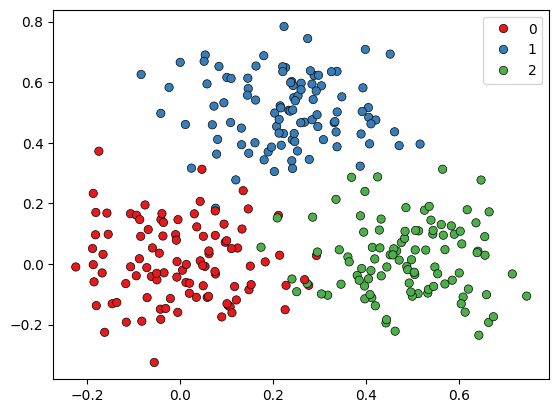

In [45]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette="Set1", edgecolor="k")


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [47]:
x_train[:5]

array([[ 0.46163023,  0.43621778],
       [ 0.19687079,  0.38579841],
       [ 0.27355002, -0.06474411],
       [ 0.07318482,  0.52110214],
       [ 0.49985808, -0.10644523]])

In [48]:
x_train.shape

(225, 2)

In [55]:
d_train = x_train[np.newaxis, :, :] # add a D0 axis(D0n , D1 , D2)
d_test = x_test[:, np.newaxis, :] # add a D1 axis(D0 , D1n , D2)
d_train.shape , d_test.shape

((1, 225, 2), (75, 1, 2))

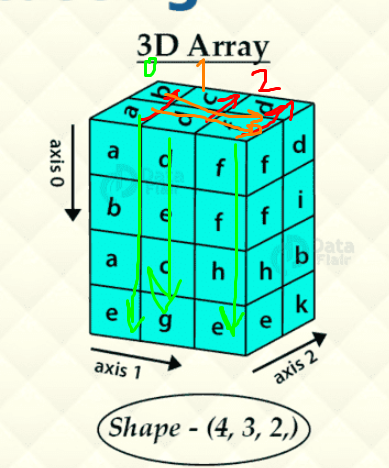

In [ ]:
"""
d_train = np.array([[[1, 2], [3, 4]],  # (2, 2, 2)
                    [[5, 6], [7, 8]]])

d_test = np.array([[[0, 0], [1, 1]],  # (2, 2, 2)
                   [[2, 2], [3, 3]]])


diff_squared:
 [[[ 1  4]  # (1-0)^2, (2-0)^2
   [ 4  9]] # (3-1)^2, (4-1)^2

  [[ 9 16]
   [16 25]]]

sum_axis2:
 [[ 5 13]  # 1+4, 4+9
  [25 41]] # 9+16, 16+25

distance:
 [[2.23606798 3.60555128]
  [5.         6.40312424]]


axis=2 → บวกค่าตามแนวคอลัมน์สุดท้าย (ลดจาก (m, n, p) เป็น (m, n))
axis=1 → บวกค่าตามแนวแถว (ลดจาก (m, n, p) เป็น (m, p))

"""

In [62]:
d_train.shape , d_test.shape

((1, 225, 2), (75, 1, 2))

In [65]:
distance = (d_train - d_test) ** 2
distance.shape

(75, 225, 2)

1. Calculate the distance between test and train data.


In [66]:
distance = np.sum(distance,axis=2) #axis = (แถว , คอลัม , ลึก) 0 1 2 if 2 เหมือนเอาความลึกมาบวกกัน
distance = np.sqrt(distance)
distance.shape

(75, 225)

2. Find K nearest neighbors


In [68]:
K = 5
i_near = np.argsort(distance, axis=1)[:, :K]
y_near = y_train[i_near]

In [69]:
y_near

array([[0, 2, 2, 2, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [2, 1, 1, 2, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 2, 2, 1, 1],
       [1, 2, 1, 1, 2],
       [1, 1, 1, 1, 1],
       [2, 2, 2,

In [70]:
# 3. majority voting
y_pred = np.array([np.bincount(p).argmax() for p in y_near])

# Measure the accuracy for test data
print('Accuracy = {:.4f}'.format((y_pred == y_test).mean()))

Accuracy = 0.9600
